## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#Conclusions)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
df= pd.read_csv("ab_data.csv")
df.head(10)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [6]:
df.shape

(294478, 5)

In [7]:
df.duplicated().sum()

0

c. The number of unique users in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


date's type is object  

In [9]:
df["group"].value_counts().to_frame()

,group
treatment,147276
control,147202


d. The proportion of users converted.

In [10]:
df["converted"].value_counts(normalize= True).to_frame()*100

,converted
0,88.034081
1,11.965919


In [11]:
#show all new_page's row
df.loc[df["landing_page"]=='new_page']

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


e. The number of times the `new_page` and `treatment` don't match.

In [12]:
# i want group to know any inforamtion i want it about new_page and old_page
df_landing_page = df.groupby(["landing_page","group"],as_index= False).size()
df_landing_page

,landing_page,group,size
0,new_page,control,1928
1,new_page,treatment,145311
2,old_page,control,145274
3,old_page,treatment,1965


the number of times the new_page and treatment don't match is 1928

In [13]:
#the new page and treatment don't match equal new page and this page control
# this dataframe which i should  work with it
df_new_page_and_control = df.loc[(df["landing_page"]== "new_page") &(df["group"]!="treatment")]
len(df_new_page_and_control)

1928

In [14]:
# this dataframe which i need it in work
df_new_page_and_treatment = df.loc[(df["landing_page"]== "new_page") &(df["group"]=="treatment")]
len(df_new_page_and_treatment)

145311

In [15]:
# this data which i will merge it with df_new_page_and_treatment  to bulid data don't have new data and treatment and old_page and conttrol
df_old_page_and_treatment = df.loc[(df["landing_page"]== "old_page") &(df["group"]!="control")]
len(df_old_page_and_treatment)

1965

In [16]:
df_old_page_and_control = df.loc[(df["landing_page"]== "old_page") &(df["group"]=="control")]
len(df_old_page_and_control)

145274

In [17]:
# i will concatenate "df_old_page_and_control" with " i will conact "df_old_page_and_control" with " to creat new data this data don't contain (new page with control) and (old page with treatment)
# i will use "conact" function in pandas library
df2= pd.concat([df_old_page_and_control , df_new_page_and_treatment] , axis=0)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


f. Do any of the rows have missing values?

In [18]:
# i want to know number of missing value by sum 
df2.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [19]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [20]:
df2["user_id"].unique()

array([851104, 804228, 864975, ..., 643562, 822004, 715931])

In [21]:
len(df2["user_id"])

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2["user_id"].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [23]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [24]:
df2.drop_duplicates(subset ="user_id", inplace = True) 
df2["user_id"].duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [25]:
df2["converted"].value_counts(normalize=True).to_frame()*100

,converted
0,88.040291
1,11.959709


In [26]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


the probalility  of an individual converting regardless of the page they receive is 11.9597





In [27]:
#some information, i will need it in probility
#control_and_converted = df2.loc([(df2["group"]=="control") &( df2["converted"]==1)])
control_and_converted = df2.loc[(df2["group"]== "control") &(df2["converted"]==1)]
len(control_and_converted)


17489

In [28]:
treatment_and_converted = df2.loc[(df2["group"]== "treatment") &(df2["converted"]==1)]
len(treatment_and_converted)

17264

In [29]:
len(df2)

290584

In [30]:
probility_control_and_converted = (len(control_and_converted) / len(df2))*100
probility_control_and_converted

6.018569501417835

In [31]:
probility_treatment_and_converted =(len(treatment_and_converted)/len(df2))*100
probility_treatment_and_converted

5.9411392230817945

In [32]:
probility_control= df2["group"].value_counts(normalize=True)*100
probility_control

treatment    50.006194
control      49.993806
Name: group, dtype: float64

probility of old_page is 49,99 and probility of new_page is 50.00

b. Given that an individual was in the `control` group, what is the probability they converted?

In [33]:
#probility of control and converted / probility of control 
probility_control_and_converted / 49.993806

0.12038630348363225

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [34]:
#probility of treatment and converted / probility of treatment
(probility_treatment_and_converted / 50.006194)*100

11.88080665183556

d. What is the probability that an individual received the new page?

In [35]:
(df2["landing_page"]=="new_page").value_counts(normalize=True)*100

True     50.006194
False    49.993806
Name: landing_page, dtype: float64

In [36]:
#other solution 
(df2[df2.landing_page == 'new_page'].count()/len(df2))*100

user_id         50.006194
timestamp       50.006194
group           50.006194
landing_page    50.006194
converted       50.006194
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


i can't know, need more information because **12.04% that received the old_page were converted. 11.88% that received the new_page were converted. In conclusion, the new_page did not increase the conversion rate.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

 i will make 
 null hypothesis is  $p_{old}$ > =$p_{new}$


$H_{1}$ : $p_{new}$< $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [37]:
# conversion rate is Usre's rate which is converted to a new_page
p_new =df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

c. What is $n_{new}$, the number of individuals in the treatment group?

In [39]:
# the mumber of individuals in the treatmeant group equal number of users which go the new page
n_new = len(df2[df2["group"]== "treatment"])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [40]:
n_old = len(df2[df2["group"]== "control"])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [41]:
new_page_converted =np.random.binomial(1,p_new,n_new) 
new_page_converted.mean()

0.11953754043080311

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [42]:
old_page_converted = np.random.binomial(1,p_new,n_old)
old_page_converted.mean()

0.1208475019618101

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [43]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013099615310069868

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [44]:
p_diff = []
for i in range (10000):
    new_page_converted =np.random.binomial(1,p_new,n_new)
    old_page_converted = np.random.binomial(1,p_new,n_old)
    p_diff.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  29.,  176.,  764., 1984., 2936., 2486., 1260.,  305.,   56.,
           4.]),
 array([-0.00435866, -0.00343571, -0.00251277, -0.00158982, -0.00066688,
         0.00025607,  0.00117901,  0.00210195,  0.0030249 ,  0.00394784,
         0.00487079]),
 <BarContainer object of 10 artists>)

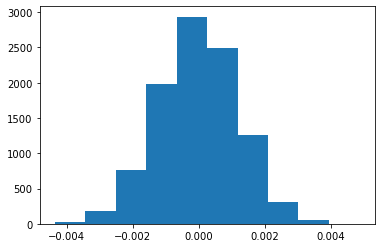

In [45]:
# the function mean not attribute list so i will convert this list to array
p_diff= np.array(p_diff)
plt.hist(p_diff)

# the plot like which i expected 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
df2_converted_treatmeant = df2.converted.loc[( df2["group"] == "treatment")]


In [47]:
df2_converted_control = df2.converted.loc[( df2["group"] == "control")]


In [48]:
diff_mean= df2_converted_treatmeant.mean()- df2_converted_control.mean()

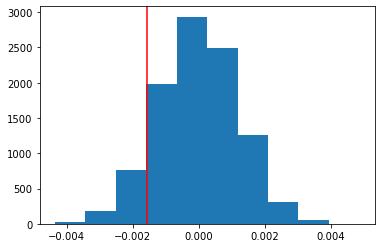

In [49]:
plt.hist(p_diff)
plt.axvline(diff_mean, color='r', label="observed difference")

In [50]:
(p_diff >  diff_mean).mean()

0.9017

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 90 % is very high proportion this proportion is called P_value
 p_value is greater than the actual difference observed in data so we can not reject the null hypothesis  $H_0 : p_{old}>= p_{new}$  
 and we can not prove the now page have  high rate converted, so we keep old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
len(df2.loc[(df2["converted"]== 1) & ( df2["landing_page"]=="old_page")])


17489

In [52]:
import statsmodels.api as sm

convert_old = len(df2.loc[(df2["converted"]== 1) & ( df2["landing_page"]=="old_page")])
convert_new = len(df2.loc[(df2["converted"]== 1) & ( df2["landing_page"]=="new_page")])
n_old =len(df2.loc[df2["landing_page"]=="old_page"])
n_new = len(df2.loc[df2["landing_page"]=="new_page"])

In [53]:
convert_old

17489

In [54]:
convert_new

17264

In [55]:
n_old

145274

In [56]:
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [57]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)

In [58]:
z_score

1.3109241984234394

In [59]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

what is z_score?
z_score is the value which represents the standard division between specially point which we want and "mean" of data
a positive value z_score is told us this point in right side of curve
p_value equal 0.95 is higer 0.05 and is closed of  p_value in **J cell**.    
**from p_value and z_score we can prove the new page is leases than the old page, I mean i can reject alternative  hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

i will use logistic regression because i have binary number in converted coulm

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [60]:
pd.get_dummies(df2, columns = ["converted"])

,user_id,timestamp,group,landing_page,converted_0,converted_1
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,1,0
...,...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,1,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,1,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,1,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,1,0


In [61]:
df2[["control", "treatment"]] = pd.get_dummies(df2["group"])

df2.head(5)

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


In [62]:
df_new = df2.drop("treatment", axis= 1)
df_new.head(5)

,user_id,timestamp,group,landing_page,converted,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [63]:
df_new.rename(columns = {'control' : 'ab_page'}, inplace = True)
df_new.head(5)

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [64]:
df_new["intercept"] = 1

In [65]:
x = sm.Logit(df_new["converted"], df_new[["intercept" , "ab_page"]])
result= x.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:               8.077e-06
Time:                        05:57:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

of course i found different between logistic and a/b testing may be this diffrent because the logistic regression is binary logistic varyable and  We are exploring two possible outcomes and it can go either way
the null and alternative hypotheses with regression model is 
$$
H_0:P_{old} = P_{new}
H_1:P_{new}!= P_{old}
$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 we can add language and UI/UX in page and color factor all this factor help us to determind proplem
 The disadvantage of adding these factors is more time and money

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [67]:
df_country=pd.read_csv("countries.csv")
df_country.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [68]:
# i want to know how many is null value? 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [69]:
# i want to know how many country in this data ?
df_country["country"].value_counts()
# we have three country so we make three dummy 

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [70]:
# i want make two database is one database
df_new_country= df_country.set_index('user_id').join(df_new.set_index('user_id'), how='inner')
df_new_country.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1


In [71]:
df_new_country[["us","uk","ca"]] = pd.get_dummies(df_new_country["country"])
df_new_country.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,us,uk,ca
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,0


In [72]:
df_new_country= df_new_country.drop(["us", "intercept"], axis= 1)
df_new_country.head(5)

,country,timestamp,group,landing_page,converted,ab_page,uk,ca
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [73]:
df_new_country["intercept"]=1

In [74]:
y= sm.Logit(df_new_country["converted"], df_new_country[["intercept","ca","uk"]])
result = y.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [75]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:               1.521e-05
Time:                        05:57:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
ca             0.0408      0.027      1.518      0.129      -0.012       0.093
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

We can, through the previous analysis, prove that these countries don't have a high rate converted because the p_value is higher than

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [76]:
df_new_country["ab_uk"] = df_new_country["ab_page"]*df_new_country["uk"]
df_new_country["ab_ca"] = df_new_country["ab_page"]*df_new_country["ca"]
lm= sm.Logit(df_new_country["converted"],df_new_country[["intercept", "ab_page", "ca",'uk','ab_uk','ab_ca']])

In [77]:
results= lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:               3.482e-05
Time:                        05:57:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0715      0.037    -55.798      0.000      -2.144      -1.999
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
ca             0.0644      0.038      1.679      0.093      -0.011       0.140
uk             0.0901      0.040      2.225      0.026       0.011       0.169
ab_uk         -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_ca         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

The p_value for both interaction terms is higher than 0.05 so, the influence of landing_page in any country( US, Uk,canada) donot different

<a id='Conclusions'></a>

# Conclusions


in conclusions:
1-we get p_value by two method, the p_value is higer than .05
2-we must keep old page or spent more time, then we do hyporthesis again
3- we should  put more factors in dataset
4- It cannot be shown that countries are increasing the conversion rate for the new page

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1